Use Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables.

### Random Forest

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

In [13]:
heart_df = pd.read_csv("../data/heart.csv" ) 

In [21]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
X = heart_df.drop(['target'] , axis=1)
y = heart_df['target'] 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [33]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='f1', n_jobs=-1)

grid_rf.fit(X_train, y_train)

from sklearn.calibration import CalibratedClassifierCV 
cal_rf = CalibratedClassifierCV(grid_rf.best_estimator_)
cal_rf.fit(X_train, y_train)

y_predict_rf = cal_rf.predict(X_test)

print("Best RF Params:", grid_rf.best_params_)
print(classification_report(y_test, y_predict_rf))


Best RF Params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



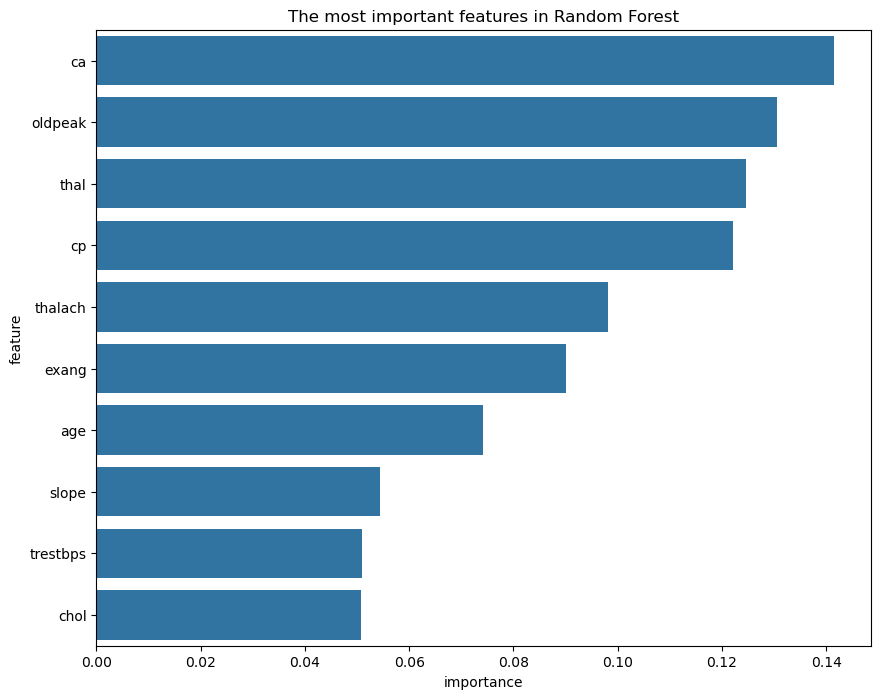

In [34]:
best_rf = grid_rf.best_estimator_

feat_imp = pd.DataFrame({
    'feature': X_train.columns, 
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feat_imp.head(10), y='feature', x='importance')
plt.title("The most important features in Random Forest")
plt.show()


### XGBoost

In [35]:
# pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 3.6 MB/s eta 0:00:42
   ---------------------------------------- 1.8/150.0 MB 3.7 MB/s eta 0:00:40
    --------------------------------------- 2.6/150.0 MB 3.8 MB/s eta 0:00:40
    --------------------------------------- 3.7/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 4.5/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 5.2/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 5.8/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 6.6/150.0 MB 3.7 MB/s eta 0:00:39
   - -------------------------------------- 7.3/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 8.4/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 9.2/150.0 MB 3.7 MB/s eta 0:00:38


In [37]:
from xgboost import XGBClassifier 

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05 , 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='f1', n_jobs=-1)

grid_xgb.fit(X_train, y_train)

from sklearn.calibration import CalibratedClassifierCV 
cal_xgb = CalibratedClassifierCV(grid_xgb.best_estimator_)
cal_xgb.fit(X_train, y_train)

y_predict_rf = cal_xgb.predict(X_test)

print("Best RF Params:", grid_xgb.best_params_)
print(classification_report(y_test, y_predict_rf))

d:\Anakonda\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:40:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Anakonda\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:40:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Anakonda\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:40:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Anakonda\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:40:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Anakonda\Lib\site-pac

Best RF Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<Figure size 1000x500 with 0 Axes>

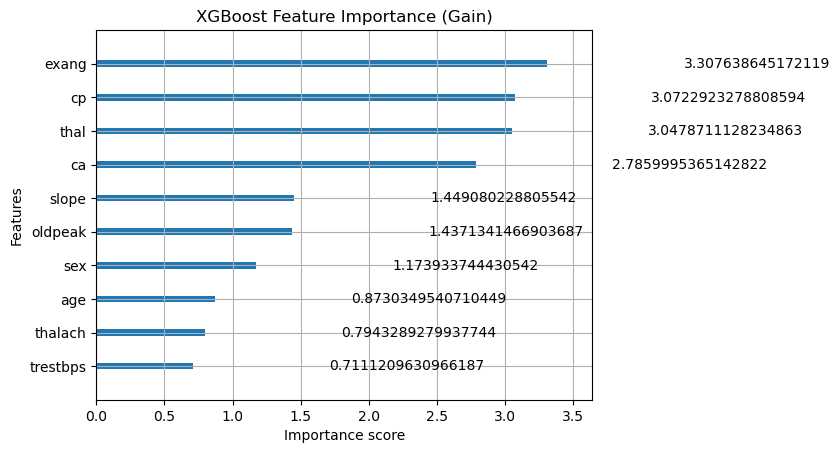

In [38]:
from xgboost import plot_importance


plt.figure(figsize=(10, 5))
plot_importance(grid_xgb.best_estimator_, importance_type='gain', max_num_features=10)
plt.title("XGBoost Feature Importance (Gain)")
plt.show()